In [1]:
from industry_dictionaries import *
from helper_functions import *
from produce_datasets import*
import numpy as np
import pandas as pd 
import seaborn as sns 
sns.set_style('darkgrid')
import matplotlib.ticker as mtick


In [2]:
def add_qtrid(df):
    '''
    adds a column for the year and quarter.

    params: df(dataframe)
    returns: dataframe with column added'''
    df['qtrid'] = df['year'] + (df['qtr']/4)
    return df

def import_one(year, dimension = 'area'):
    '''brings a single year's woth of data into a dataframe. Used for initial EDA. 
    Referenced in import_all

    params: year(str)
    returns: df(dataframe)'''
    filepath = '../data/' + dimension + '_files/' + str(year) + '.csv'
    #all relevant csvs are renamed with only the year
    df = pd.read_csv(filepath, dtype = schema_dict)
    #schema_dict is found in dictionaries.py
    for column in drop_columns:
        if column in df.columns:
            df = df.drop([column], axis = 1)
    if dimension == 'area':
        df = df.drop(columns = ['industry_code', 'industry_title'])
    elif dimension == 'industry':
        df = df.drop(columns = ['area_fips', 'area_title'])
    return df

def import_all(years, dimension = 'area'):
    '''combines as many years ofdata into a single dataframe, as well as adding quater id
    References import_one and add_qtrid

    params: years (list of str)
    returns: df (dataframe)'''
    df = import_one(years[0], dimension)
    for year in years[1:]:
        df = df.append(import_one(year, dimension))
    if dimension == 'industry':
        df['industry_code'] = df['industry_code'].str.replace('31-33','31')
        df['industry_code'] = df['industry_code'].str.replace('44-45','44')
        df['industry_code'] = df['industry_code'].str.replace('48-49','48').astype('int32')
    df = add_qtrid(df)
    return df

In [3]:
df = import_all(recessions_int['full'], dimension = 'industry')
df

,industry_code,agglvl_code,year,qtr,industry_title,agglvl_title,qtrly_estabs_count,month1_emplvl,month2_emplvl,month3_emplvl,total_qtrly_wages,avg_wkly_wage,oty_month1_emplvl_pct_chg,oty_month2_emplvl_pct_chg,oty_month3_emplvl_pct_chg,oty_total_qtrly_wages_pct_chg,oty_taxable_qtrly_wages_pct_chg,oty_qtrly_contributions_pct_chg,oty_avg_wkly_wage_pct_chg,qtrid
0,10,10,2000,1,"Total, all industries","National, Total Covered",7826995,126352639,126977629,128382759,1139641437117,689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.25
1,10,10,2000,2,"Total, all industries","National, Total Covered",7875131,129380449,130778347,131822109,1109900612460,653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.50
2,10,10,2000,3,"Total, all industries","National, Total Covered",7933006,129190188,129692207,131137819,1114426155413,659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.75
3,10,10,2000,4,"Total, all industries","National, Total Covered",7977519,131225754,131626564,131988539,1224833506635,716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.00
4,10,11,2000,1,"Total, all industries","National, Total -- by ownership sector",49951,2761847,2780175,2872449,32666726996,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,9999,16,2020,1,NAICS 9999 Unclassified,"National, NAICS 4-digit -- by ownership sector",209363,178607,192405,193069,2863058672,1171,61.9,65.6,62.3,76.7,69.5,74.2,8.1,2020.25
4539,99999,17,2020,1,NAICS 99999 Unclassified,"National, NAICS 5-digit -- by ownership sector",209363,178607,192405,193069,2863058672,1171,61.9,65.6,62.3,76.7,69.5,74.2,8.1,2020.25
4540,999999,18,2020,1,NAICS 999999 Unclassified,"National, NAICS 6-digit -- by ownership sector",209363,178607,192405,193069,2863058672,1171,61.9,65.6,62.3,76.7,69.5,74.2,8.1,2020.25
4541,10,95,2020,1,"10 Total, all industries",Total Government (U.S.),302010,21990303,22201550,22249558,327171190678,1136,1.3,1.1,0.9,3.8,3.0,5.5,2.6,2020.25


In [4]:
df = df.pivot_table(columns = 'qtrid', values = 'month3_emplvl', index = ['industry_code'], aggfunc = np.sum)
df

qtrid,2000.25,2000.50,2000.75,2001.00,2001.25,2001.50,2001.75,2002.00,2002.25,2002.50,...,2018.00,2018.25,2018.50,2018.75,2019.00,2019.25,2019.50,2019.75,2020.00,2020.25
industry_code,,,,,,,,,,,,,,,,,,,,,
10,402487852.0,412644261.0,410514408.0,413488734.0,406660923.0,412554119.0,407651445.0,406860089.0,400229102.0,407450305.0,...,456922226.0,452748513.0,461176897.0,459565267.0,463595878.0,458925368.0,466571448.0,465161688.0,469391079.0,460659104.0
11,1075812.0,1352286.0,1337463.0,1090392.0,1049212.0,1315058.0,1291827.0,1063966.0,1037388.0,1288052.0,...,1160863.0,1146859.0,1395000.0,1365370.0,1159168.0,1133216.0,1386260.0,1374789.0,1170255.0,1150086.0
21,501050.0,514959.0,521158.0,520320.0,523621.0,548175.0,547480.0,531137.0,505017.0,513124.0,...,646430.0,655179.0,679650.0,687605.0,689961.0,682931.0,687285.0,670974.0,643645.0,622823.0
22,845966.0,857873.0,843721.0,844972.0,837786.0,851427.0,841093.0,843745.0,838292.0,846349.0,...,813567.0,811779.0,819936.0,811172.0,809994.0,808939.0,817913.0,810631.0,810874.0,808239.0
23,6529756.0,7111232.0,7127272.0,6847425.0,6676321.0,7237914.0,7200035.0,6868261.0,6578842.0,7087261.0,...,7155970.0,7084920.0,7606877.0,7624096.0,7455393.0,7325663.0,7815315.0,7838089.0,7618057.0,7450207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926150,83522.0,85364.0,85384.0,85451.0,86255.0,87439.0,87709.0,86369.0,86574.0,87431.0,...,94387.0,96198.0,97261.0,96643.0,96620.0,95954.0,97039.0,96936.0,97022.0,96755.0
927110,17285.0,18154.0,17500.0,17508.0,17792.0,17560.0,17657.0,17528.0,17336.0,17516.0,...,17195.0,17127.0,17233.0,17477.0,17259.0,17162.0,17341.0,17531.0,17316.0,17194.0
928110,524911.0,528112.0,521462.0,520320.0,516830.0,521809.0,520243.0,515632.0,509815.0,515117.0,...,544560.0,541012.0,547414.0,551089.0,557591.0,554851.0,554339.0,560478.0,570174.0,575807.0


In [5]:
df = df.fillna(0)

In [6]:
df = df.reset_index()


In [7]:
added = df[df[2001.25] == 0]['industry_code']

In [8]:
added

298       4522
299       4523
434       7225
500      21112
501      21113
         ...  
2277    561312
2414    722511
2415    722513
2416    722514
2417    722515
Name: industry_code, Length: 121, dtype: int64

In [9]:
subtracted = df[df[2020.25] == 0]['industry_code']
subtracted

86         516
297       4521
300       4529
343       5161
344       5171
         ...  
2275    561310
2406    722110
2407    722211
2408    722212
2409    722213
Name: industry_code, Length: 266, dtype: int64

In [10]:
df.columns

Index(['industry_code',         2000.25,          2000.5,         2000.75,
                2001.0,         2001.25,          2001.5,         2001.75,
                2002.0,         2002.25,          2002.5,         2002.75,
                2003.0,         2003.25,          2003.5,         2003.75,
                2004.0,         2004.25,          2004.5,         2004.75,
                2005.0,         2005.25,          2005.5,         2005.75,
                2006.0,         2006.25,          2006.5,         2006.75,
                2007.0,         2007.25,          2007.5,         2007.75,
                2008.0,         2008.25,          2008.5,         2008.75,
                2009.0,         2009.25,          2009.5,         2009.75,
                2010.0,         2010.25,          2010.5,         2010.75,
                2011.0,         2011.25,          2011.5,         2011.75,
                2012.0,         2012.25,          2012.5,         2012.75,
                2013.0,  

In [11]:
zeroes ={}
for index, row in df.iterrows():
    if not np.prod(row[1:]):
        key = (int(row['industry_code']))
        if key in industry_titles.keys():
            zeroes[key] = industry_titles[key]
        else:
            zeroes[key] = 'UNKNOWN'
print(len(zeroes))


371


In [12]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [13]:
df.set_index('industry_code', inplace = True)

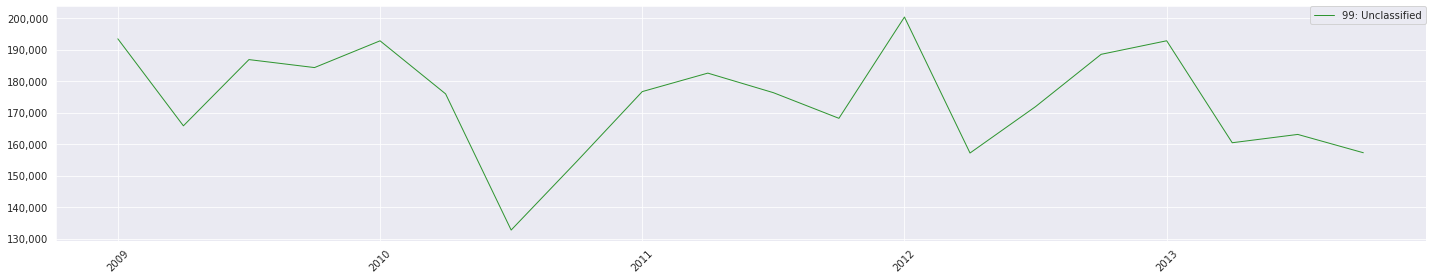

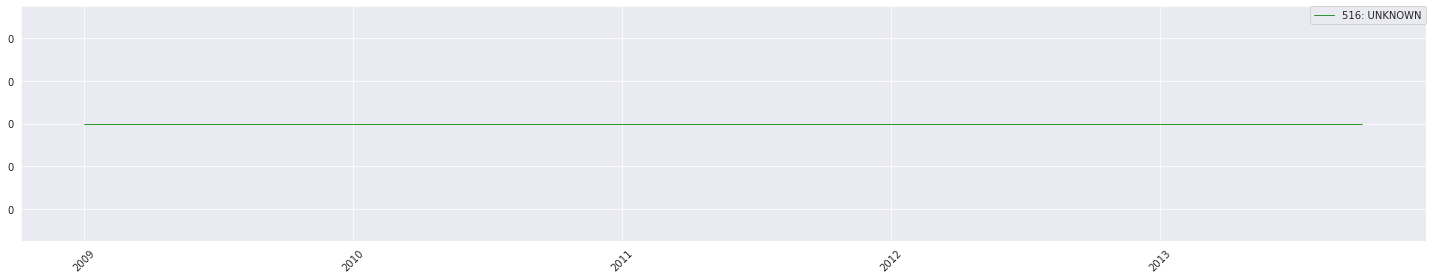

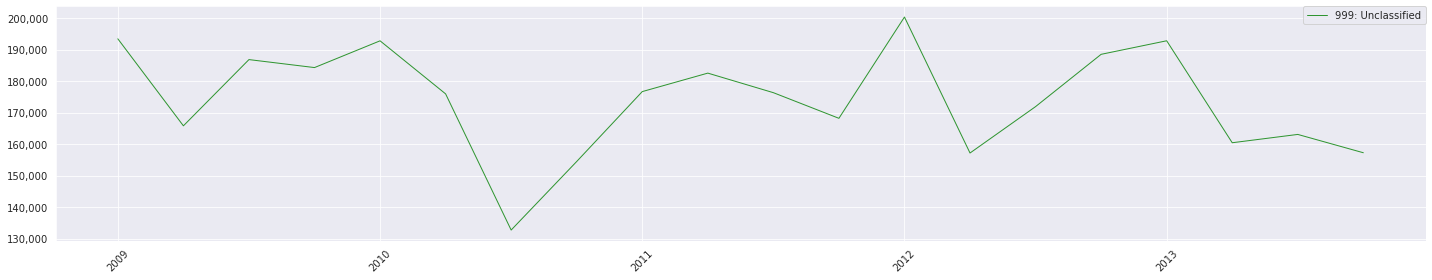

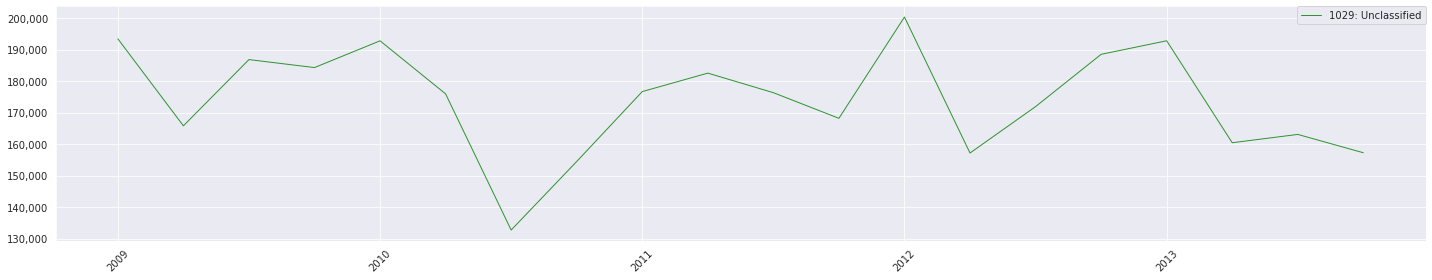

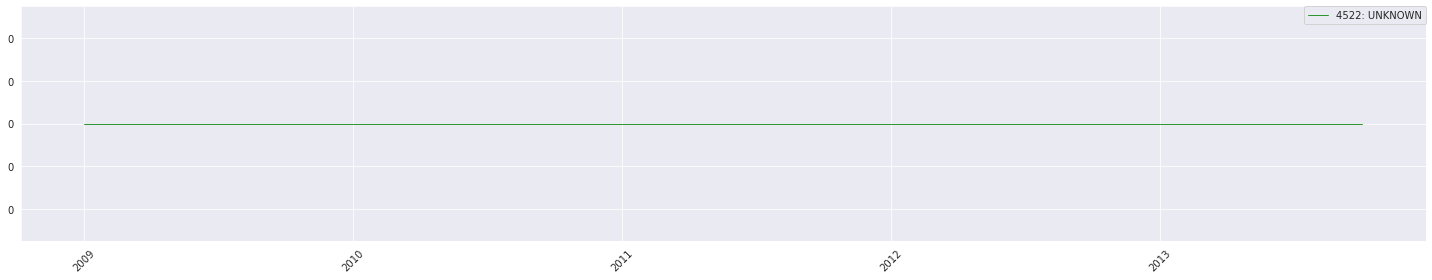

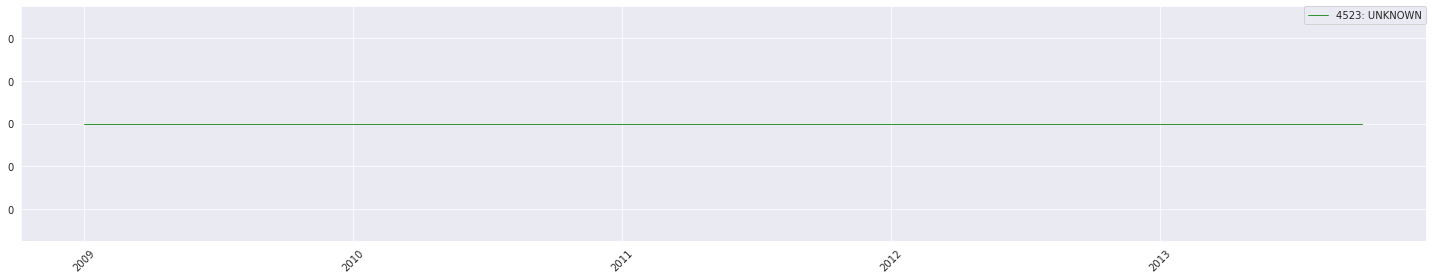

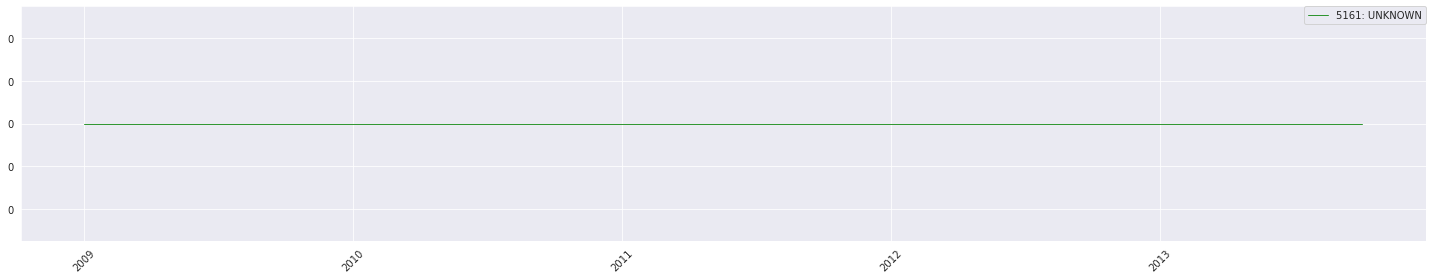

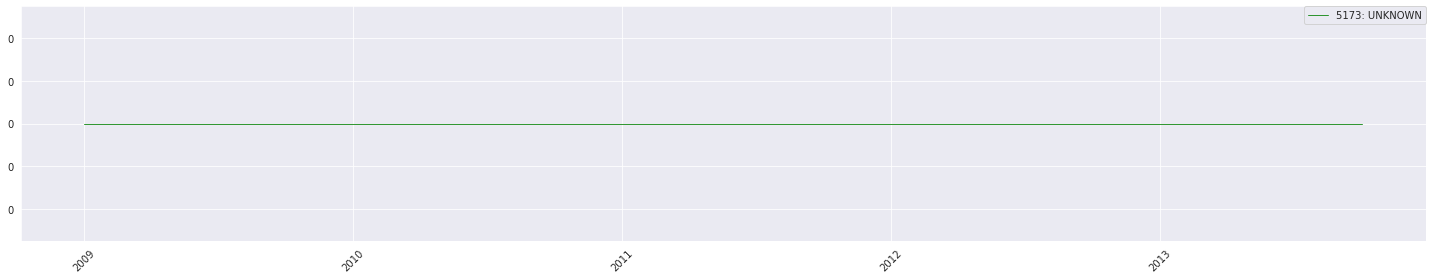

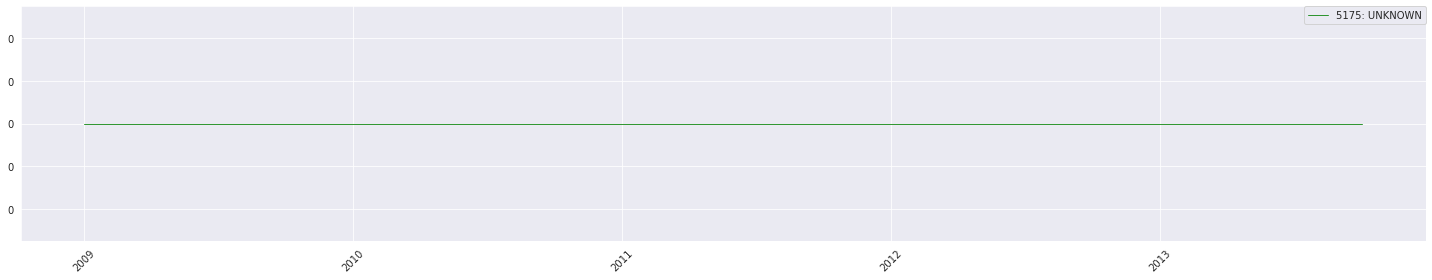

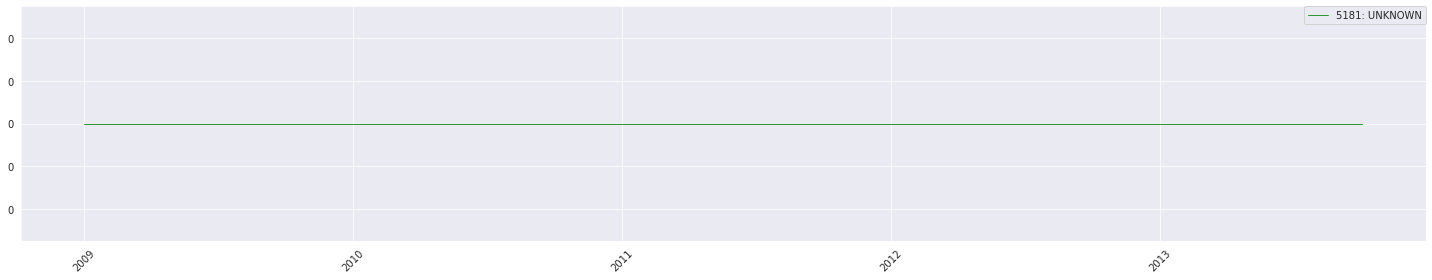

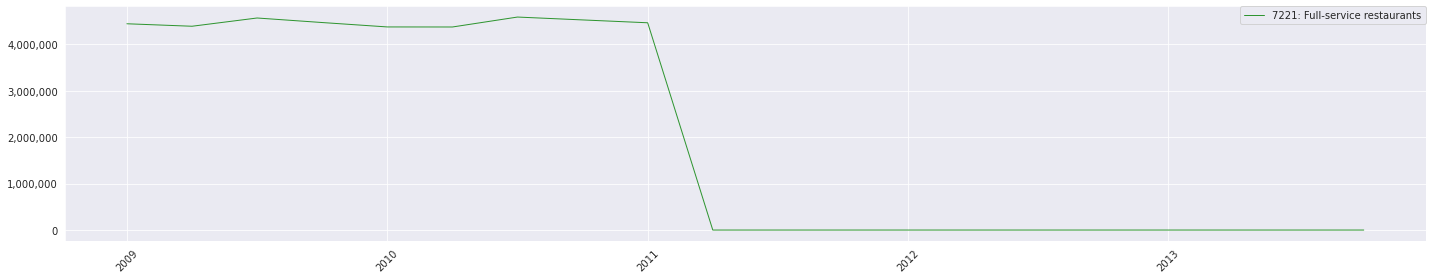

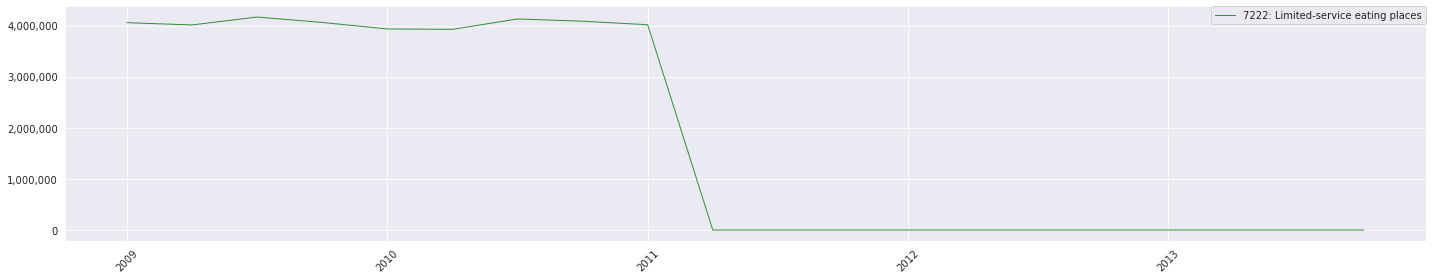

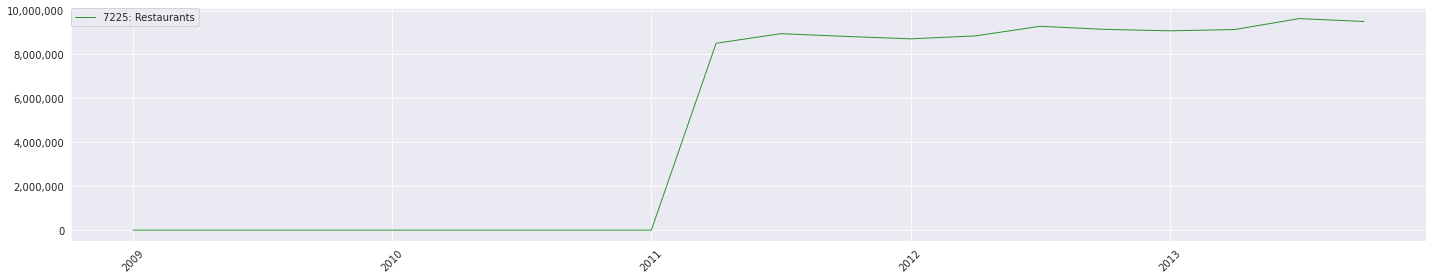

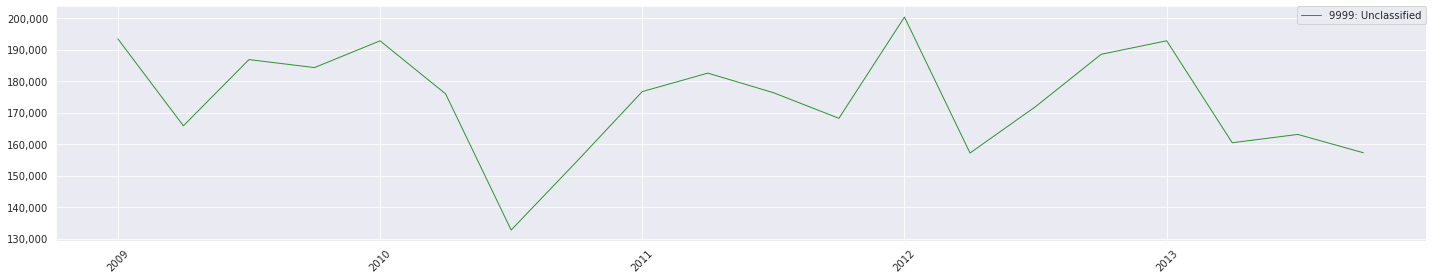

In [24]:
for k, v in zeroes.items():
    if k > 0 and k < 10000:
        fig, ax = plt.subplots(figsize = (20, 4))
        ax.plot(df.columns[35:55], df.loc[k][35:55], color = 'green', linewidth = 1, alpha = 0.8, label = str(k) + ': ' + v)
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.tick_params(axis='both', which='minor', labelsize=10)
        ax.ticklabel_format(style = 'plain', axis = 'y', scilimits = (9, -1));
        ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
        ax.legend(fancybox = True, borderaxespad=0)
        plt.xticks(rotation=45)
        plt.tight_layout()
        # cont = input('Press Enter to Continue')

In [15]:
df

qtrid,2000.25,2000.50,2000.75,2001.00,2001.25,2001.50,2001.75,2002.00,2002.25,2002.50,...,2018.00,2018.25,2018.50,2018.75,2019.00,2019.25,2019.50,2019.75,2020.00,2020.25
industry_code,,,,,,,,,,,,,,,,,,,,,
10,402487852.0,412644261.0,410514408.0,413488734.0,406660923.0,412554119.0,407651445.0,406860089.0,400229102.0,407450305.0,...,456922226.0,452748513.0,461176897.0,459565267.0,463595878.0,458925368.0,466571448.0,465161688.0,469391079.0,460659104.0
11,1075812.0,1352286.0,1337463.0,1090392.0,1049212.0,1315058.0,1291827.0,1063966.0,1037388.0,1288052.0,...,1160863.0,1146859.0,1395000.0,1365370.0,1159168.0,1133216.0,1386260.0,1374789.0,1170255.0,1150086.0
21,501050.0,514959.0,521158.0,520320.0,523621.0,548175.0,547480.0,531137.0,505017.0,513124.0,...,646430.0,655179.0,679650.0,687605.0,689961.0,682931.0,687285.0,670974.0,643645.0,622823.0
22,845966.0,857873.0,843721.0,844972.0,837786.0,851427.0,841093.0,843745.0,838292.0,846349.0,...,813567.0,811779.0,819936.0,811172.0,809994.0,808939.0,817913.0,810631.0,810874.0,808239.0
23,6529756.0,7111232.0,7127272.0,6847425.0,6676321.0,7237914.0,7200035.0,6868261.0,6578842.0,7087261.0,...,7155970.0,7084920.0,7606877.0,7624096.0,7455393.0,7325663.0,7815315.0,7838089.0,7618057.0,7450207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926150,83522.0,85364.0,85384.0,85451.0,86255.0,87439.0,87709.0,86369.0,86574.0,87431.0,...,94387.0,96198.0,97261.0,96643.0,96620.0,95954.0,97039.0,96936.0,97022.0,96755.0
927110,17285.0,18154.0,17500.0,17508.0,17792.0,17560.0,17657.0,17528.0,17336.0,17516.0,...,17195.0,17127.0,17233.0,17477.0,17259.0,17162.0,17341.0,17531.0,17316.0,17194.0
928110,524911.0,528112.0,521462.0,520320.0,516830.0,521809.0,520243.0,515632.0,509815.0,515117.0,...,544560.0,541012.0,547414.0,551089.0,557591.0,554851.0,554339.0,560478.0,570174.0,575807.0


In [25]:
industry_changes= {}
for index, row in df.iterrows():
    if index in industry_changes.keys():
        industry_changes[index] = 'ODD'
    if row[2007.00] == 0 and row[2007.25] > 0:
        industry_changes[index] = 'Added 2007'
    if row[2007.25] == 0 and row[2007.0] > 0:
        industry_changes[index] = 'Removed 2007'
    if row[2011.00] == 0 and row[2011.25] > 0:
        industry_changes[index] = 'Added 2011'
    if row[2011.25] == 0 and row[2011.0] > 0:
        industry_changes[index] = 'Removed 2011'
    if row[2017.00] == 0 and row[2017.25] > 0:
        industry_changes[index] = 'Added 2017'
    if row[2017.25] == 0 and row[2017.0] > 0:
        industry_changes[index] = 'Removed 2017'

industry_changes


{516: 'Removed 2007',
 4521: 'Removed 2017',
 4522: 'Added 2017',
 4523: 'Added 2017',
 4529: 'Removed 2017',
 5161: 'Removed 2007',
 5171: 'Removed 2017',
 5172: 'Removed 2017',
 5173: 'Added 2017',
 5175: 'Removed 2007',
 5181: 'Removed 2007',
 7221: 'Removed 2011',
 7222: 'Removed 2011',
 7225: 'Added 2011',
 21111: 'Removed 2017',
 21112: 'Added 2017',
 21113: 'Added 2017',
 31132: 'Removed 2011',
 31133: 'Removed 2011',
 31135: 'Added 2011',
 31221: 'Removed 2011',
 31222: 'Removed 2011',
 31223: 'Added 2011',
 31523: 'Removed 2011',
 31524: 'Added 2011',
 31528: 'Added 2011',
 31529: 'Removed 2011',
 33321: 'Removed 2011',
 33322: 'Removed 2011',
 33324: 'Added 2011',
 33329: 'Removed 2011',
 44311: 'Removed 2011',
 44312: 'Removed 2011',
 44313: 'Removed 2011',
 44314: 'Added 2011',
 45122: 'Removed 2011',
 45211: 'Removed 2017',
 45221: 'Added 2017',
 45231: 'Added 2017',
 45291: 'Removed 2017',
 45299: 'Removed 2017',
 51221: 'Removed 2017',
 51222: 'Removed 2017',
 51225: 'Ad

defaultdict(list,
            {'Removed 2007': [516,
              5161,
              5175,
              5181,
              51611,
              51751,
              51811,
              52593,
              339111,
              516110,
              517211,
              517212,
              517310,
              517510,
              517910,
              518111,
              518112,
              525930,
              541710,
              561310],
             'Removed 2017': [4521,
              4529,
              5171,
              5172,
              21111,
              45211,
              45291,
              45299,
              51221,
              51222,
              51711,
              51721,
              53222,
              53223,
              53229,
              211111,
              211112,
              212231,
              212234,
              333911,
              333913,
              335221,
              335222,
              452111,
             